In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(r"C:\sachin\Python\Human Resource Management\output.csv")

In [12]:
data.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184878 entries, 0 to 184877
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           184878 non-null  object
 1   District Code                        184878 non-null  object
 2   India/States                         184878 non-null  object
 3   Division                             184878 non-null  object
 4   Group                                184878 non-null  object
 5   Class                                184878 non-null  object
 6   NIC Name                             184878 non-null  object
 7   Main Workers - Total -  Persons      184878 non-null  int64 
 8   Main Workers - Total - Males         184878 non-null  int64 
 9   Main Workers - Total - Females       184878 non-null  int64 
 10  Main Workers - Rural -  Persons      184878 non-null  int64 
 11  Main Workers - Rural - Mal

In [14]:
data.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [15]:
# Remove backticks (`) and convert to integer
data["Division"] = data["Division"].str.replace("`", "").astype(int)
data["Group"] = data["Group"].str.replace("`", "").astype(int)
data["Class"] = data["Class"].str.replace("`", "").astype(int)

In [18]:
# Drop columns
data = data.drop(["State Code", "District Code"], axis=1)

In [25]:
data.dtypes

India/States                           int32
Division                               int32
Group                                  int32
Class                                  int32
NIC Name                               int32
Main Workers - Total -  Persons        int64
Main Workers - Total - Males           int64
Main Workers - Total - Females         int64
Main Workers - Rural -  Persons        int64
Main Workers - Rural - Males           int64
Main Workers - Rural - Females         int64
Main Workers - Urban -  Persons        int64
Main Workers - Urban - Males           int64
Main Workers - Urban - Females         int64
Marginal Workers - Total -  Persons    int64
Marginal Workers - Total - Males       int64
Marginal Workers - Total - Females     int64
Marginal Workers - Rural -  Persons    int64
Marginal Workers - Rural - Males       int64
Marginal Workers - Rural - Females     int64
Marginal Workers - Urban -  Persons    int64
Marginal Workers - Urban - Males       int64
Marginal W

### Encoding 

In [24]:
# encoding for two colmns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(data["India/States"])
le.fit_transform(data["NIC Name"])
data["India/States"] = le.fit_transform(data["India/States"])
data["NIC Name"] = le.fit_transform(data["NIC Name"])

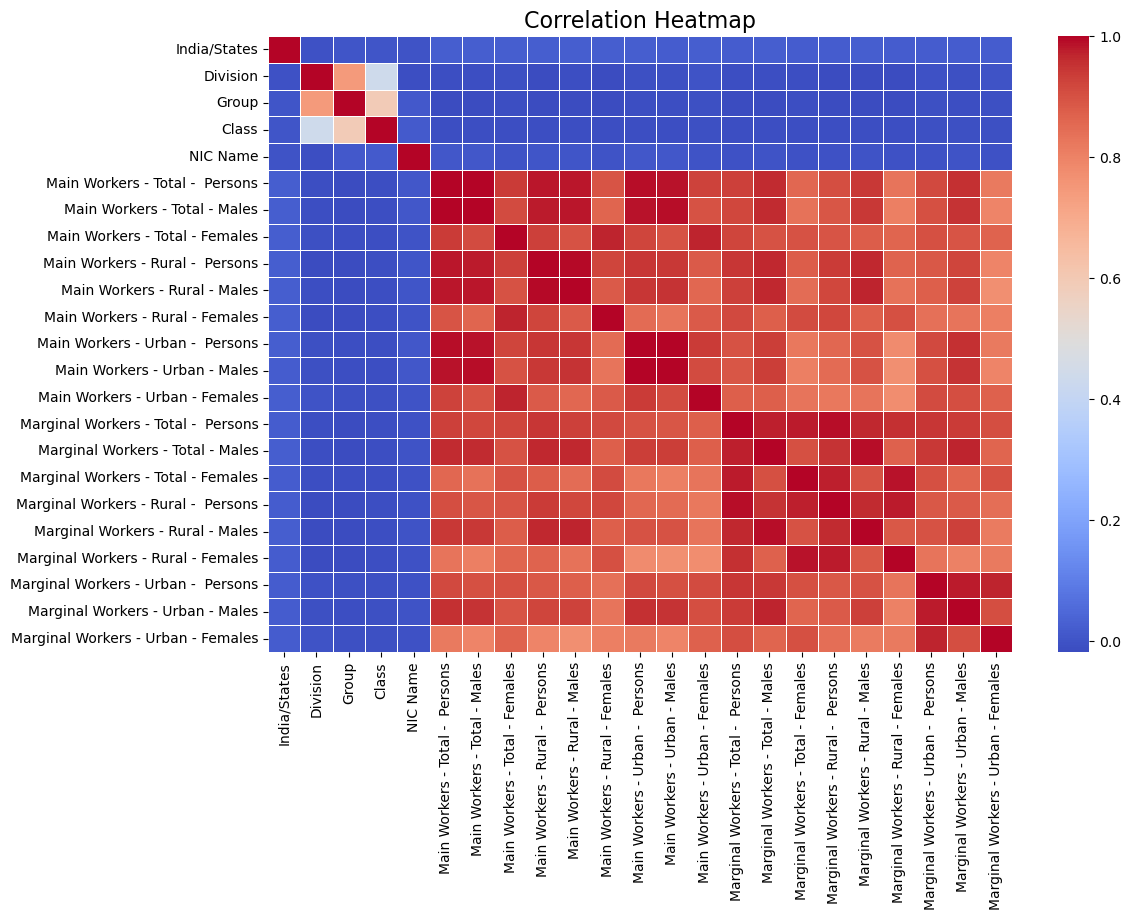

In [26]:
# Compute correlation matrix (numeric columns only)
corr = data.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Feature selection 

In [ ]:
# Features
X = data.drop("NIC Name", axis=1)
y = data["NIC Name"]

# ✅ Keep only top 10 categories
top_10_classes = y.value_counts().nlargest(10).index
mask = y.isin(top_10_classes)

X = X[mask]
y = y[mask]

print("Remaining classes:", y.nunique())
print("Class distribution:\n", y.value_counts())


Remaining classes: 10
Class distribution:
 NIC Name
62     1362
15     1227
205    1161
564    1116
557    1044
139     910
295     903
394     886
36      862
354     856
Name: count, dtype: int64


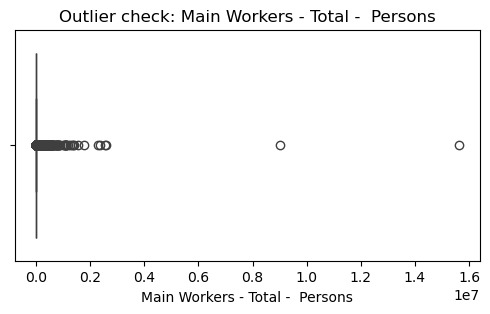

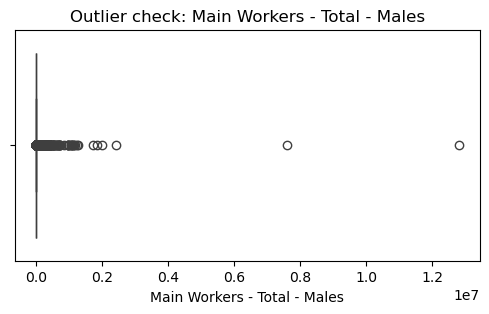

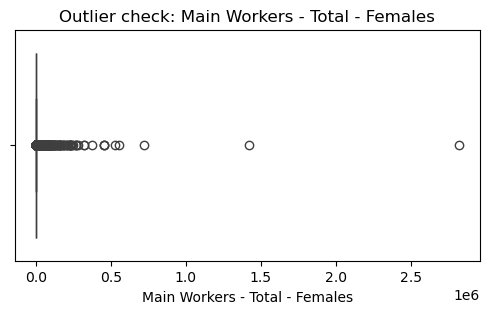

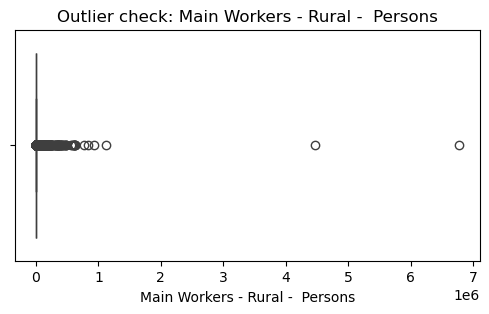

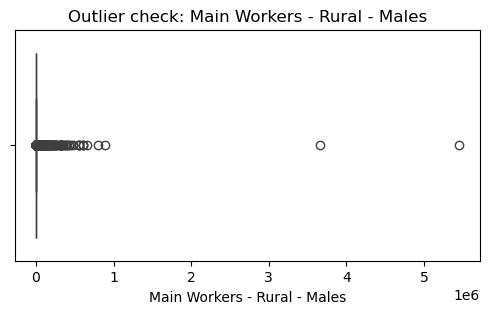

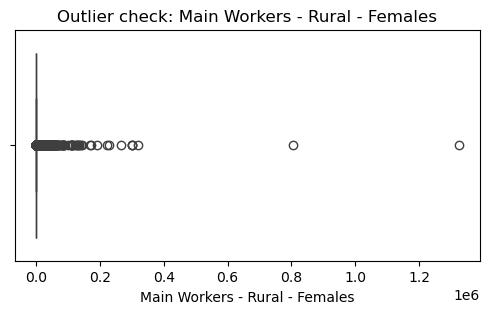

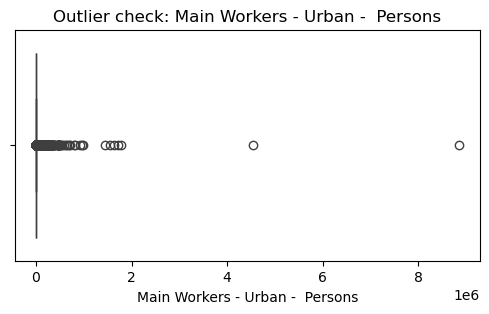

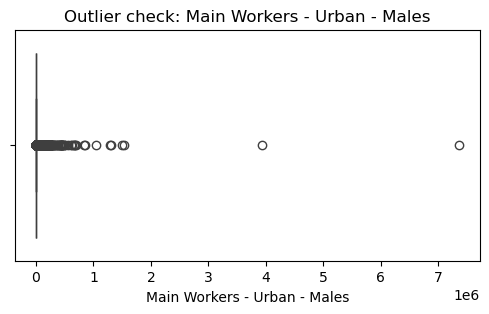

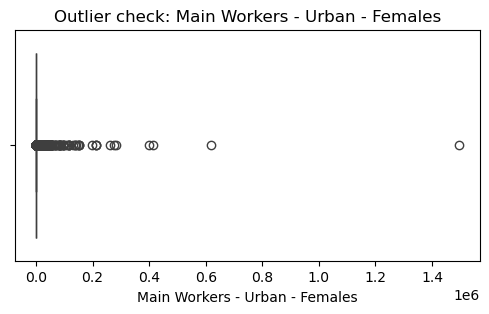

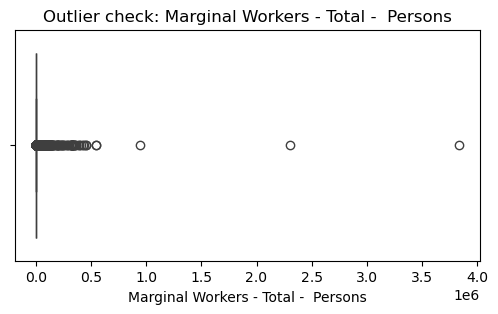

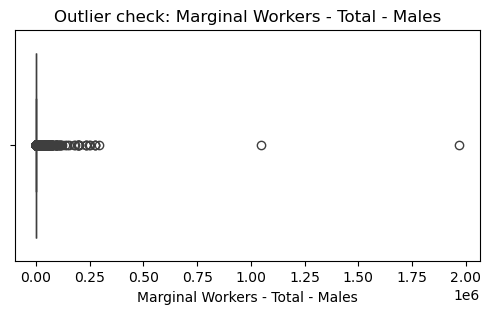

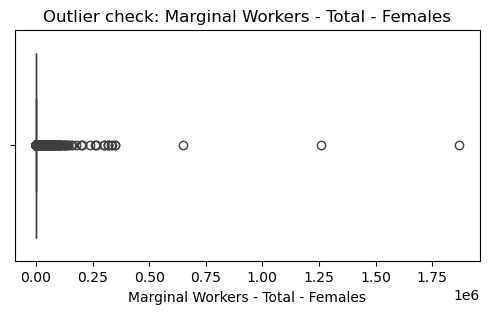

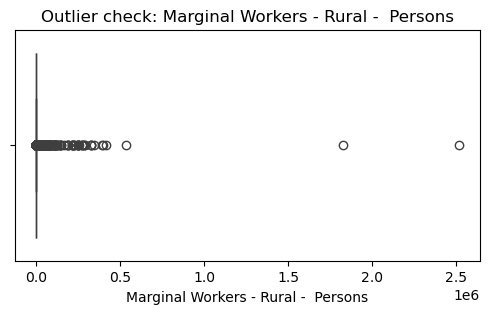

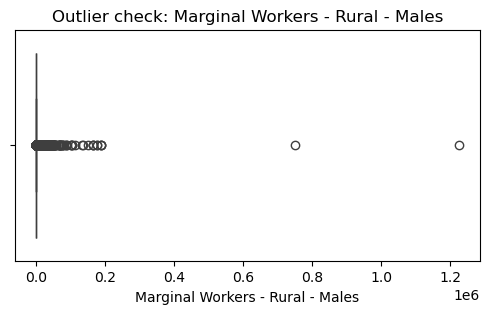

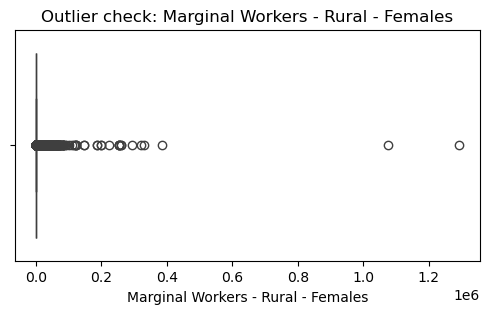

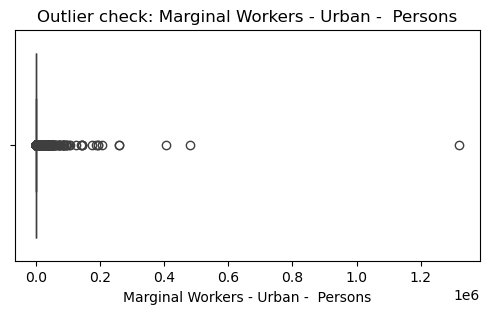

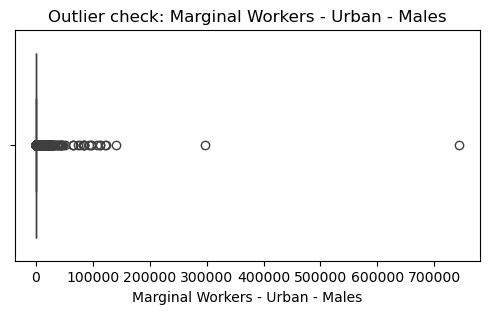

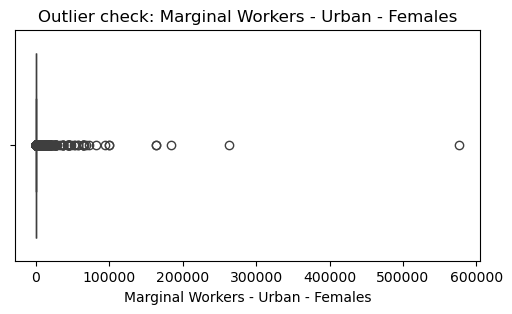

In [49]:
for col in X.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=data[col])
    plt.title(f"Outlier check: {col}")
    plt.show()

### StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### train test split

In [52]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Building 

### LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9230396902226524
              precision    recall  f1-score   support

          15       1.00      0.97      0.98       261
          36       0.89      0.46      0.61       169
          62       1.00      0.93      0.97       282
         139       0.61      0.95      0.74       160
         205       1.00      1.00      1.00       232
         295       1.00      1.00      1.00       182
         354       0.87      0.96      0.91       168
         394       0.96      0.87      0.91       190
         557       1.00      1.00      1.00       204
         564       0.92      1.00      0.96       218

    accuracy                           0.92      2066
   macro avg       0.92      0.91      0.91      2066
weighted avg       0.94      0.92      0.92      2066



### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

          15       1.00      1.00      1.00       261
          36       1.00      1.00      1.00       169
          62       1.00      1.00      1.00       282
         139       1.00      1.00      1.00       160
         205       1.00      1.00      1.00       232
         295       1.00      1.00      1.00       182
         354       1.00      1.00      1.00       168
         394       1.00      1.00      1.00       190
         557       1.00      1.00      1.00       204
         564       1.00      1.00      1.00       218

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066



### RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

          15       1.00      1.00      1.00       261
          36       1.00      1.00      1.00       169
          62       1.00      1.00      1.00       282
         139       1.00      1.00      1.00       160
         205       1.00      1.00      1.00       232
         295       1.00      1.00      1.00       182
         354       1.00      1.00      1.00       168
         394       1.00      1.00      1.00       190
         557       1.00      1.00      1.00       204
         564       1.00      1.00      1.00       218

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066



### KNeighbous

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN Accuracy: 0.9007744433688286
              precision    recall  f1-score   support

          15       0.98      0.97      0.97       261
          36       0.49      0.45      0.47       169
          62       0.99      0.99      0.99       282
         139       0.48      0.54      0.50       160
         205       0.99      0.99      0.99       232
         295       1.00      0.98      0.99       182
         354       0.93      0.96      0.94       168
         394       0.96      0.93      0.94       190
         557       1.00      1.00      1.00       204
         564       1.00      1.00      1.00       218

    accuracy                           0.90      2066
   macro avg       0.88      0.88      0.88      2066
weighted avg       0.90      0.90      0.90      2066



### SVC

In [58]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))     

SVM Accuracy: 0.8049370764762827
              precision    recall  f1-score   support

          15       1.00      0.47      0.64       261
          36       0.74      0.15      0.25       169
          62       1.00      1.00      1.00       282
         139       0.35      0.94      0.51       160
         205       1.00      1.00      1.00       232
         295       1.00      1.00      1.00       182
         354       0.60      0.98      0.74       168
         394       0.96      0.42      0.59       190
         557       1.00      1.00      1.00       204
         564       1.00      1.00      1.00       218

    accuracy                           0.80      2066
   macro avg       0.87      0.80      0.77      2066
weighted avg       0.89      0.80      0.80      2066



### GaussianNB Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

          15       1.00      1.00      1.00       261
          36       1.00      1.00      1.00       169
          62       1.00      1.00      1.00       282
         139       1.00      1.00      1.00       160
         205       1.00      1.00      1.00       232
         295       1.00      1.00      1.00       182
         354       1.00      1.00      1.00       168
         394       1.00      1.00      1.00       190
         557       1.00      1.00      1.00       204
         564       1.00      1.00      1.00       218

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066



### Gradient Boosting

In [38]:
# from sklearn.ensemble import GradientBoostingClassifier

# gb = GradientBoostingClassifier(random_state=42)
# gb.fit(X_train, y_train)

# y_pred = gb.predict(X_test)
# print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

### AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.510164569215876
              precision    recall  f1-score   support

          15       0.32      1.00      0.48       261
          36       1.00      1.00      1.00       169
          62       0.39      1.00      0.56       282
         139       1.00      1.00      1.00       160
         205       0.00      0.00      0.00       232
         295       1.00      1.00      1.00       182
         354       0.00      0.00      0.00       168
         394       0.00      0.00      0.00       190
         557       0.00      0.00      0.00       204
         564       0.00      0.00      0.00       218

    accuracy                           0.51      2066
   macro avg       0.37      0.50      0.40      2066
weighted avg       0.34      0.51      0.38      2066



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Extra Trees

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

y_pred = et.predict(X_test)
print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Extra Trees Accuracy: 0.9995159728944821
              precision    recall  f1-score   support

          15       1.00      1.00      1.00       261
          36       1.00      1.00      1.00       169
          62       1.00      1.00      1.00       282
         139       1.00      1.00      1.00       160
         205       1.00      1.00      1.00       232
         295       1.00      1.00      1.00       182
         354       1.00      1.00      1.00       168
         394       1.00      1.00      1.00       190
         557       1.00      1.00      1.00       204
         564       1.00      1.00      1.00       218

    accuracy                           1.00      2066
   macro avg       1.00      1.00      1.00      2066
weighted avg       1.00      1.00      1.00      2066



### XGBoost

In [62]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got [ 15  36  62 139 205 295 354 394 557 564]

### Save 

In [63]:
import joblib
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes again on full training data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Save model
joblib.dump(nb_model, "naive_bayes_model.pkl")

print("✅ Naive Bayes model saved as naive_bayes_model.pkl")


✅ Naive Bayes model saved as naive_bayes_model.pkl


In [64]:
# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save label encoder for target (if used)
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']